# Семинар 4

## Что мы сегодня узнаем?

* Как работает KMeans (K-средних)
* Как работает кластеризация DBSCAN
* Роль нормализации данных

#### А что вообще почитать про кластеризацию?

- вот [этот пост](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/) очень хорош, гифки позаимствованы оттуда.

# Какие бывают кластеры?

Код ниже генерирует кластеры различной формы и выводит их на экран

Populating the interactive namespace from numpy and matplotlib


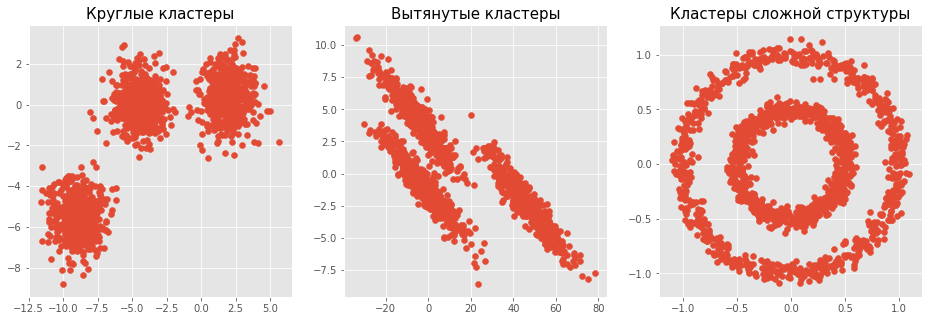

In [1]:
%pylab inline

# именно вот эта волшебная строчка делает наши графики
# довольно эстетичными с точки зрения ценителя хорошего дизайна
plt.style.use('ggplot')

from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# эта строчка просто задает размер графика
plt.figure(figsize=(16, 5))

# тут мы генерируем облакоподобные кластера
X, y = make_blobs(n_samples=1500, centers=3, random_state=170)

# тут мы говорим, что хотим вывести 1-й график в 1-й строчке, в которой всего 3 графика
plt.subplot(131)
# и выводим его
plt.scatter(X[:, 0], X[:, 1], edgecolors='face')
plt.title(u"Круглые кластеры", fontsize=15)

# тут происходит страшная матричная магия, чтобы из круглях кластеров получить вытянутые
transformation = [[0.9, -0.9], [-9.9, 1.9]] # матрица преобразования
X_long = np.dot(X, transformation) # умножим на нее, чтобы растянуть кучки

# тут мы говорим, что хотим вывести 2-й график в 1-й строчке, в которой всего 3 графика
plt.subplot(132)
plt.scatter(X_long[:, 0], X_long[:, 1], edgecolors='face')
plt.title(u"Вытянутые кластеры", fontsize=15)

# генерируем вложенные кружки
X_circles, y = make_circles(n_samples=1500, factor=0.5, noise=0.05)

# тут мы говорим, что хотим вывести 3-й график в 1-й строчке, в которой всего 3 графика
plt.subplot(133)
plt.scatter(X_circles[:, 0], X_circles[:, 1], edgecolors='face')
plt.title(u"Кластеры сложной структуры", fontsize=15)
plt.show()

# Task 0

Сейчас вы узнаете как писать нельзя. Но, напишите, пожалуйста, функцию, которая генерирует кластер вашей любимой формы (название функции не менять, пожалуйста).
<img src='crab.jpg' width=500>

In [ ]:
def верни_мои_любимые_кластера(сколько_точек, сколько_кластеров):
    # твой код тут # (つ▀¯▀)つ
    return X,y

In [2]:
# Solution
from sklearn.datasets import make_moons
def верни_мои_любимые_кластера(сколько_точек, сколько_кластеров=None):
    X, y = make_moons(n_samples=сколько_точек, random_state=170, noise=0.06)
    return X,y

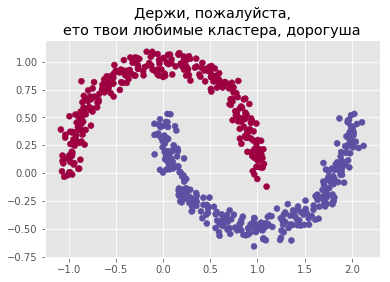

In [22]:
# check
X, y = верни_мои_любимые_кластера(сколько_точек=600, сколько_кластеров=2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Spectral')
plt.title("Держи, пожалуйста,\nето твои любимые кластера, дорогуша")
plt.show()

# Алгоритм k-means для задачи кластеризации

<img src="http://dendroid.sk/wp-content/uploads/2013/01/kmeansimg-scaled1000.jpg" width=400>

Алгоритм k-means применяется для задачи кластеризации. Напомню его основные шаги.

Пусть у нас имеется N точек на плоскости ${(x_1,y_1),...,(x_N,y_N)}$
Допустим мы хотим разбить их на k=3 кластера.
1. Выбираем k=3 случайные точки из этого множества. Говорим, что они являются теперь центрами наших кластеров.
2. Для каждой из оставшихся точек смотрим, к какому из центров она ближе и определяем её в этот кластер.
3. У нас получилось разбить точки на 3 кластера. Естественно это не оптимальное разбиение. Найдём новые центры кластеров. Например, если точки ${(x_{i_1}, y_{i_1}),...,(x_{i_n}, y_{i_n})}$ попали в один кластер, то их новый центр будет имеет координаты:
$$x_M=\frac{x_{i_1}+...+x_{i_n}}{n}$$
$$y_M=\frac{y_{i_1}+...+y_{i_n}}{n}$$
4. Переходим к шагу 2 и продолжаем до тех пор, пока кластеры не перестанут меняться. Т.е. пока полная сумма расстояний от каждой точки до центра ее кластера не будет похожа на константу (с наперед заданной точностью).

Если у вас есть интернет, то хорошо бы посмотреть визуализацию:
[Ссылка на визуализацию](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

<img src="kmeans.gif" width=600>
Анимация показывает как меняется полная сумма расстояний от каждой точки до центра ее кластера. Видно, что в конце эта сумма остается неизменной. На этом и заканчивается кластеризация.

# Task 1

Реализуйте функцию, которая считает сумму расстояний от всех входных точек $X = \{x_1, x_2, ... x_n\}$ до центров их кластеров $centroids = \{c_1, c_2, ... c_n\}$.

Здесь 
* $c_i, x_i$ - это вектора размера $d$;

Функция должна считать следующее:

$$\Large\sum_{i=0}^{i=n} distance(c_i, x_i)$$

В качестве функции расстояния между точкой $x_i$ и центром ее кластера $c_i$ возьмите MSE:

$$\Large distance(c_i, x_i) = \sum_{k=0}^{k=d} (c_{ik}-x_{ik})^2$$

**Напоминание:** матрицы одинакового размера можно вычитать друг из друга, при этом вычитание будет происходить поэлементно. Пример ниже.

In [22]:
p = np.diag([1,2,3,4])
p

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [23]:
np.zeros((4,4))-p

array([[-1.,  0.,  0.,  0.],
       [ 0., -2.,  0.,  0.],
       [ 0.,  0., -3.,  0.],
       [ 0.,  0.,  0., -4.]])

In [ ]:
def total_inner_distance(X, centroids):
    """
    X: np.array; shape=[n, d]
    centroids: np.array; shape=[n, d]
    return: одно число, пожалуйста!
    """
    # твой код тут # (つ▀¯▀)つ

In [27]:
# Solution
def total_inner_distance(X, centroids):
    """
    X: np.array; shape=[n, d]
    centroids: np.array; shape=[n, d]
    return: одно число, пожалуйста!
    """
    return np.sum((X - centroids)**2)

In [28]:
# базовая проверка
assert np.isreal(total_inner_distance(np.random.rand(3,4),\
                    np.random.rand(3,4))),'Вы что-то не то вернули из функции'

# Task 2

Реализуйте KMeans

In [29]:
# Вспомогательная функция для визуализации
def show_me(points, colors=None, centroids=None, colorbar=False):
    points_x = points[:,0]
    points_y = points[:,1]
    plt.scatter(x=points_x, y=points_y, c=colors, cmap='summer')
    if centroids is not None:
        for i,c in enumerate(centroids):
            plt.scatter(c[0], c[1], label="centroid {}".format(i), marker='X', s=100)
        plt.legend()
    if colorbar:
        plt.colorbar()
    plt.show()

In [30]:
from copy import deepcopy

In [35]:
# Solution
# Код алгоритма
def k_means(points: np.array, num_clusters: int, max_iter: int = 10, epsilon:float = 0.00001):
    """
    points: список из пар координат точек
    num_clusters: число кластеров, на которое необходимо поделить

    return: номера кластеров и их центры
    """
    # Выбираем начальные центры кластеров (просто первые num_clusters точек)
    centroids = deepcopy(points[:num_clusters])
    
    # В качестве результата будет массив с номерами кластеров для каждой точки
    num_points = len(points)
    result = [-1] * num_points
    
    # Выведем на экран стартовую ситуацию
    print("Входные данные")
    show_me(points)
    
    # Работаем пока не исчерпаем максимальное количество итераций
    # или пока сумма расстояний до центра кластера не перестанет меняться больше, чем не epsilon
    diff_inner_distance = epsilon+1 # начальная разница больше epsilon
    total_inner_dist_val = 0
    inner_distances = []
    it_num = 0

    while (it_num<max_iter) and (diff_inner_distance>=epsilon):
        
        # Определяем каждую точку к кластеру:
        # для каждой точки в цикле 
        # 1) посчитайте ее расстояние до каждого из центроидов (используй `np.linalg.norm()`)
        # 2) добавьте в result номер центроида,
        #    который соответствует минимальному расстоянию
        #    до этой точки (`np.argmin()` хорошая функция)
        # 
        # твой код тут # (つ▀¯▀)つ
        for i,point in enumerate(points):
            distances = [np.linalg.norm(point-centroid) for centroid in centroids]
            classification = np.argmin(distances)
            result[i]=classification
            
        # Выведем то, что у нас получилось
        it_num += 1
        print("Итерация №{}".format(it_num))
        show_me(points, colors=result, centroids=centroids)
        
        # Меняем центры кластеров:
        # Нужно заменить старые центроиды в centroids на новые.
        # Каждый новый центроид получается как
        # средний вектор для всех векторов-точек в соответствующем кластере
        # твой код тут # (つ▀¯▀)つ
        result = np.array(result)
        for i in range(num_clusters):
            centroids[i] = np.mean(points[result == i], axis=0)
        
        # Посчитаем внутрикластерные расстояния
        centroids_resulted = [centroids[i] for i in result] # получили вектор-центроид для каждой точки
        new_total_inner_dist_val = total_inner_distance(points, centroids_resulted)
        diff_inner_distance =  np.abs(total_inner_dist_val - new_total_inner_dist_val)
        total_inner_dist_val = new_total_inner_dist_val
        
        # Хотим построить графичек, поэтому накапливаем тут значения
        inner_distances.append(new_total_inner_dist_val)
        
    return result, centroids, inner_distances

In [60]:
X, y = make_blobs(n_samples=800, centers=3)

Входные данные


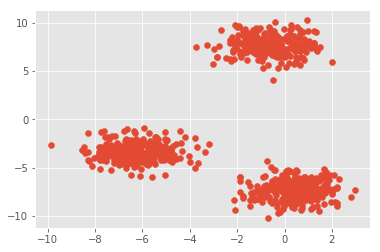

Итерация №1


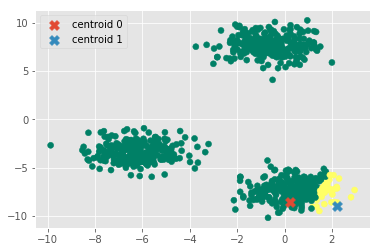

Итерация №2


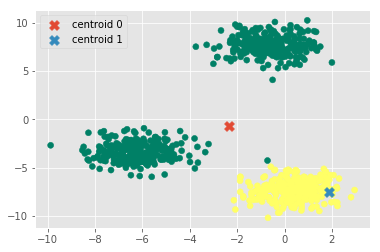

Итерация №3


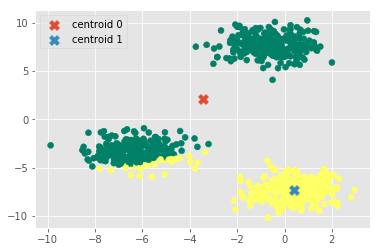

Итерация №4


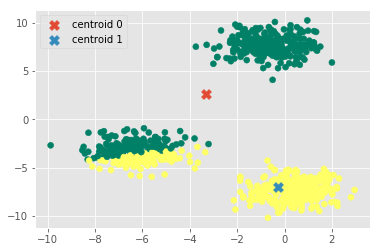

Итерация №5


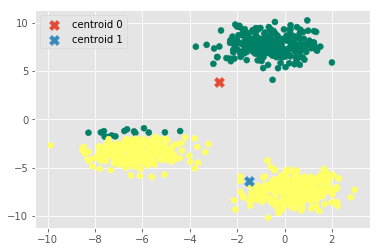

Итерация №6


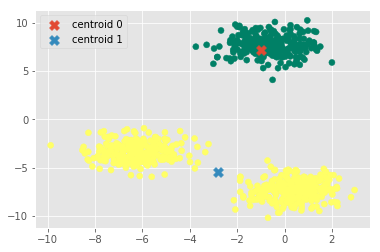

Итерация №7


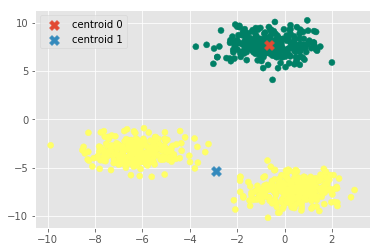

In [61]:
result, centroids, inner_distances = k_means(X, num_clusters=2, epsilon=1e-10)

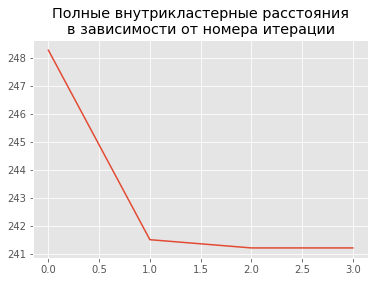

In [34]:
plt.plot(range(len(inner_distances)), inner_distances)
plt.title("Полные внутрикластерные расстояния\nв зависимости от номера итерации")
plt.show()

**Плюсы**:
* простой и понятный

**Минусы**:
* нужно знать K
* слишком простая модель, кластер = выпуклая околокруглая штука
* если плохо выбрать начальные центры, может сойтись к плохому результату

Поэтому обычно K-Means запускают несколько раз и выбирают лучший результат.

---

# DBSCAN (Density-based spatial clustering of applications with noise)

Кратко о том, как работает DBSCAN:

<img src='dbscan1.gif'>

Гиперпараметры:
* $numPts -$ минимальное количество точек в соседстве, чтобы добавить их в кластер
* $\epsilon -$ максимальное расстояние до точки, чтобы считать ее соседом

**Как выглядит кластеризация?**

<img src='dbscan2.gif'>

**Плюсы**:
* Не надо знать К!
* Может определять даже кластеры со сложной структурой
* Умеет убирать шум!

**Минусы**:
* Скорее всего не сможет корректно выделить кластеры, имеющие разную плотность
* Надо подбирать $\epsilon$
* Надо подбирать $numPts$

In [167]:
ls -lh

total 6,3M
-rw-r--r-- 1 fogside fogside 476K дек 18 12:56 04_clustering.ipynb
-rw-rw-r-- 1 fogside fogside  29K дек 18 03:01 crab.jpg
-rw-rw-r-- 1 fogside fogside 401K дек 18 05:59 dbscan1.gif
-rw-rw-r-- 1 fogside fogside 4,2M дек 18 06:02 dbscan2.gif
-rw-rw-r-- 1 fogside fogside 640K дек 17 21:36 kmeans.gif
-rw-r--r-- 1 fogside fogside 467K дек 17 21:43 sem14_clustering.ipynb
-rw-rw-r-- 1 fogside fogside  68K дек 18 12:55 z_score.png


# Масштабирование данных

$${\displaystyle z\_score ={\frac {x-{\bar {x}}}{\sigma }}} $$

* $\bar x$ -- среднее значение вектора $x$ (это число одно) 
* $\sigma$ -- стандартное отклонение значений вектора $x$ от среднего (это тоже одно число)
* $x$ -- это вектор, т.е. это массив чисел.
* $x_i$ -- элемент вектора $x$, т.е. одно число.

$${\displaystyle \sigma ={\sqrt {{\frac {1}{n}}\sum _{i=1}^{n}\left(x_{i}-{\bar {x}}\right)^{2}}};}$$

Если вместо $x$ мы запишем соответствующие $z\_score$, то среднее значение будет равно 0, а все значения $z_score$ будут стандартизированы, т.к. значение $z\_score_i$ - это количество стандартных отклонений от среднего для данного исходного значения $x_i$

<img src="z_score.png" width=500>

**Зачем это делать?**

Если произвести масштабирование данных, то признаки, сильно отличающиеся по абсолютным значениям, будут соизмеримы, а значит, мы сможем адекватно измерять расстояния между точками. А ведь именно на этом основаны рассматриваемые методы кластеризации.

# Task 3

* Отмасштабируйте данные с помощью `StandardScaler`

* Подберите параметры DBSCAN так, чтобы ваши любимые кластера (из задания 1) разделялись.

* Если у вас скучноватые любимые кластера (а именно, `blobs`), сделайте задание, используя кластера:
```python
    X, y = make_moons(n_samples=сколько_точек, random_state=170, noise=0.06)
```


In [169]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [163]:
X_scaled = # твой код тут # (つ▀¯▀)つ

In [ ]:
# Solution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Нужно подобрать параметры алгоритма, чтобы кластеры разделялись

In [ ]:
dbscan = DBSCAN(eps=?, min_samples=?)
predictions = dbscan.fit_predict(X_scaled)
show_me(points=X, colors=predictions, colorbar=True)

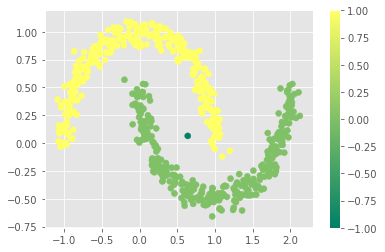

In [149]:
# Solution
dbscan = DBSCAN(eps=0.3, min_samples=2)
predictions = dbscan.fit_predict(X_scaled)
show_me(points=X, colors=predictions, colorbar=True)

# Task 4

**Кластеризация картинки**

Кластеризуйте картинку с помощью алгоритма KMeans;

image shape:  (225, 400, 3)


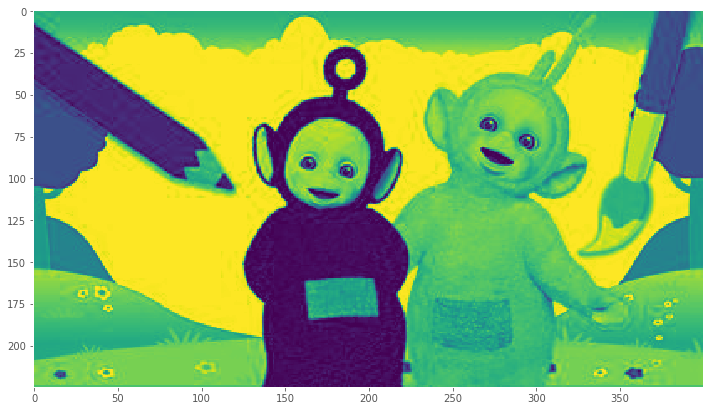

In [39]:
from PIL import Image
import urllib

def load_image(infilename):
    if infilename.startswith('https'):
        f = urllib.request.urlopen(infilename)
        img = Image.open(f)
    else:
        img = Image.open(infilename)
    img.load()
    data = np.asarray(img, dtype="float32")
    return data

def save_image(img,outfilename):
    img.save(outfilename)
    

url="https://ichef.bbci.co.uk/childrens-responsive-ichef-ck/400xn/amz/cbeebies/teletubbies-map-hero.jpg"
pic = load_image(url)
# pic = load_image("cat_photo.png")
print("image shape: ", pic.shape)
plt.figure(figsize=(12,10))
plt.imshow(pic[:,:,1])
plt.grid(False)
plt.show()

In [40]:
pic.shape

(225, 400, 3)

In [41]:
from sklearn.cluster import KMeans

Воспользуйтесь операцией `pic.reshape()` чтобы изменить размеры картики так, чтобы получилась 2-мерная матрица
каждая строка которой -- это один пиксель картинки, а количество столбцов -- это количество каналов в картинке (RGB, например, имеет 3 канала).

In [ ]:
X_input = pic.reshape(# твой код тут # (つ▀¯▀)つ)

In [42]:
# Solution
X_input = pic.reshape((pic.shape[0]*pic.shape[1], -1))

Кластеризуйте матрицу `X_input`, количество цветов выберите не большим (например, 6)

In [ ]:
# твой код тут # (つ▀¯▀)つ

In [55]:
#Solution
km = KMeans(n_clusters=10)
labels = km.fit_predict(X_input)

С помощью той же функции `reshape` переведите полученные значения labels в размерность исходной картинки

In [ ]:
pic_clustered = # твой код тут # (つ▀¯▀)つ

In [56]:
# Solution
pic_clustered = labels.reshape((pic.shape[0],pic.shape[1]))

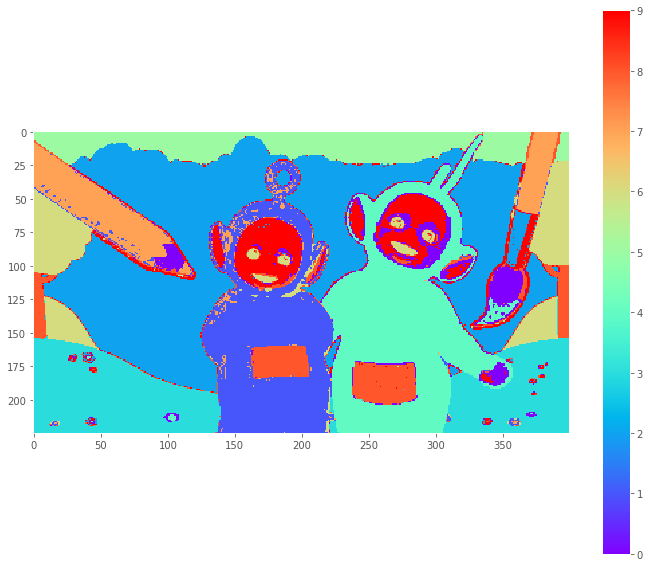

In [57]:
plt.figure(figsize=(12,10))
plt.imshow(pic_clustered, cmap = 'rainbow')
plt.colorbar()
plt.grid(False)